In [1]:
import pandas as pd
import geopandas as gp
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

In [3]:
cities = gp.read_file(gp.datasets.get_path('naturalearth_cities'))

In [4]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [5]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


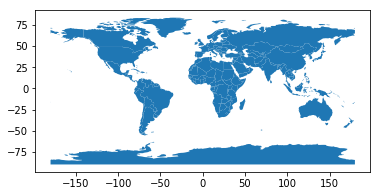

In [6]:
world.plot()

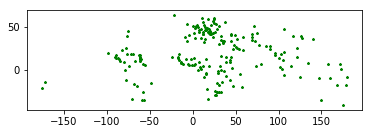

In [7]:
cities.plot(marker='*', color='green', markersize=5);

In [8]:
cities = cities.to_crs(world.crs)

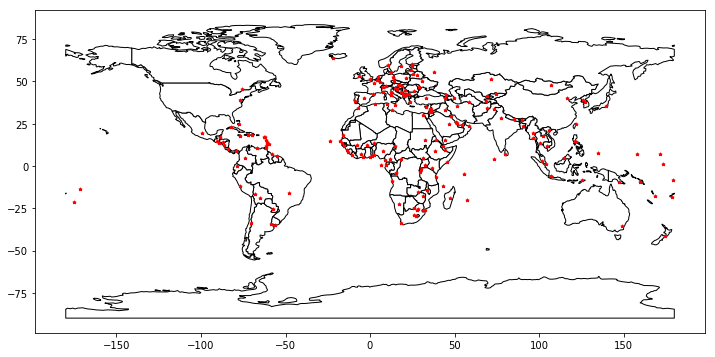

In [9]:
base = world.plot(color='white', edgecolor='black', figsize=(12, 12))
cities.plot(ax=base, marker='*', color='red', markersize=10);

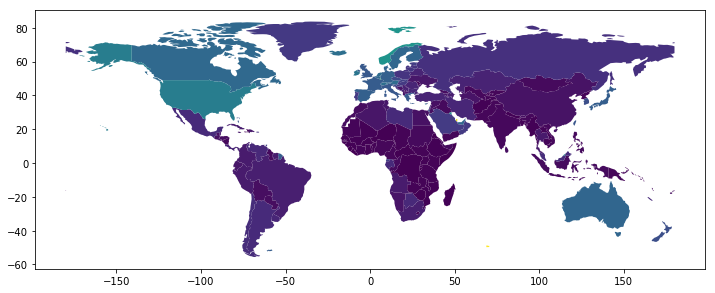

In [10]:
# Plot by GDP per capta
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap', figsize=(12, 12));

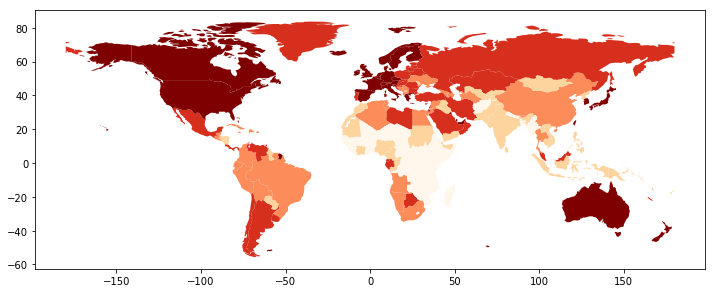

In [11]:
#install pySAL to plot using different schemes
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles', figsize = (12, 12));

In [15]:
sf = gp.read_file('../../../../geopandas/geo_export_023a5824-eb50-4524-8415-fbab9bc520cd.shp')
sf.head()

,link,name,geometry
0,"http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...",Seacliff,POLYGON ((-122.4934552679999 37.78351817100008...
1,,Lake Street,POLYGON ((-122.4871507149999 37.78378542700005...
2,http://www.nps.gov/prsf/index.htm,Presidio National Park,POLYGON ((-122.4775801709999 37.81099311300005...
3,,Presidio Terrace,POLYGON ((-122.4724105299999 37.78734653900005...
4,http://www.sfgate.com/neighborhoods/sf/innerri...,Inner Richmond,POLYGON ((-122.4726257899999 37.78631480600006...


In [ ]:
sf.plot(figsize=(8, 8))

In [17]:
df = pd.DataFrame.from_csv('../../../../geopandas/201508_station_data.csv')

In [18]:
df.head()

,name,lat,long,dockcount,landmark,installation
station_id,,,,,,
2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [19]:
df['geometry'] = df.apply(lambda x: Point((float(x.long), float(x.lat))), axis=1)
df = gp.GeoDataFrame(df, geometry='geometry')
df.head()

,name,lat,long,dockcount,landmark,installation,geometry
station_id,,,,,,,
2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013,POINT (-121.901782 37.329732)
3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013,POINT (-121.888979 37.330698)
4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013,POINT (-121.894902 37.333988)
5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013,POINT (-121.8932 37.331415)
6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013,POINT (-121.894074 37.336721)


In [20]:
df = df[df.landmark == 'San Francisco']

In [21]:
print(df.crs)

None


In [22]:
sf.crs

{'init': 'epsg:4326'}

In [23]:
df.crs = sf.crs

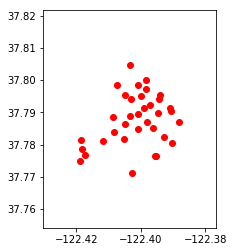

In [24]:
df.plot(color = 'red')

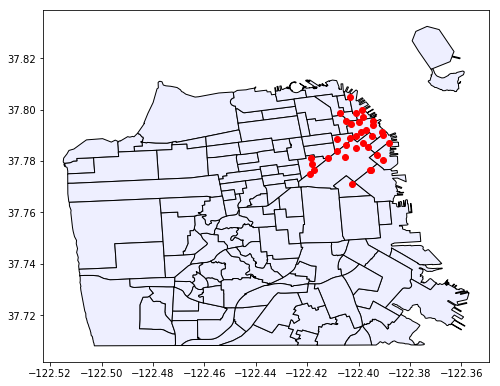

In [25]:
base = sf.plot(color = '#eeefff', edgecolor='black', figsize = (8, 8))
df.plot(ax=base, marker='o', color='red');

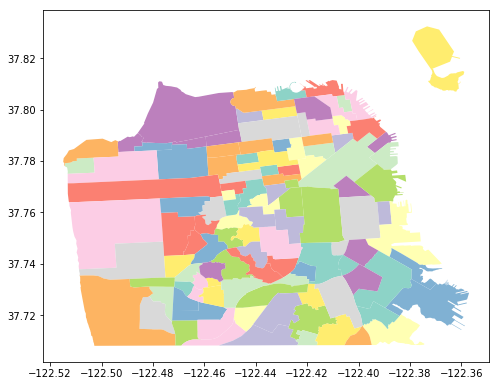

In [26]:
sf.plot(column='name', cmap='Set3', figsize = (8, 8));

In [27]:
df_joined = gp.tools.sjoin(df,sf, how="right", op='within')
df_joined.head()

,index_left,name_x,lat,long,dockcount,landmark,installation,link,name_y,geometry
index_right,,,,,,,,,,
17,71.0,Powell at Post (Union Square),37.788446,-122.408499,19.0,San Francisco,8/23/2013,http://www.sfgate.com/neighborhoods/sf/unionsq...,Downtown / Union Square,POLYGON ((-122.4023804019999 37.79096861000005...
17,39.0,Powell Street BART,37.783871,-122.408433,19.0,San Francisco,8/25/2013,http://www.sfgate.com/neighborhoods/sf/unionsq...,Downtown / Union Square,POLYGON ((-122.4023804019999 37.79096861000005...
17,47.0,Post at Kearney,37.788975,-122.403452,19.0,San Francisco,8/19/2013,http://www.sfgate.com/neighborhoods/sf/unionsq...,Downtown / Union Square,POLYGON ((-122.4023804019999 37.79096861000005...
19,59.0,Golden Gate at Polk,37.781332,-122.418603,23.0,San Francisco,8/21/2013,"http://en.wikipedia.org/wiki/Civic_Center,_San...",Civic Center,POLYGON ((-122.4125122549999 37.78047851100007...
19,58.0,San Francisco City Hall,37.778650,-122.418235,19.0,San Francisco,8/21/2013,"http://en.wikipedia.org/wiki/Civic_Center,_San...",Civic Center,POLYGON ((-122.4125122549999 37.78047851100007...


In [28]:
sf_center = Point((float(-122.4194), float(37.7749)))

df['dist_from_sf_center'] = [l.distance(sf_center) for l in df.geometry]

In [29]:
df['dist_from_sf_center']*62.1371

index_left
41    1.737146
42    1.905446
45    1.578306
46    1.566299
47    1.321702
48    2.026297
49    2.027357
50    2.018080
51    2.041084
39    0.880406
54    2.093619
55    1.794041
56    1.756373
57    0.983786
58    0.244000
59    0.402722
60    2.110427
61    1.842405
62    1.577732
63    1.521062
64    1.718647
65    1.063767
66    0.028224
67    0.164578
68    1.299847
69    1.490688
70    1.503779
71    1.080410
72    0.609579
73    1.650723
74    1.958492
75    1.623957
76    1.143077
77    1.473549
82    1.866756
Name: dist_from_sf_center, dtype: float64